In [1]:
#importing Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data set
df=pd.read_csv("wine.csv")
#randaom taking 10 data
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,1
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,2
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,2
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,2
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,2
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520,2
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1
156,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,3
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,2


In [3]:
#to check how many type of Customer_Segment
df["Customer_Segment"].unique()

array([1, 2, 3], dtype=int64)

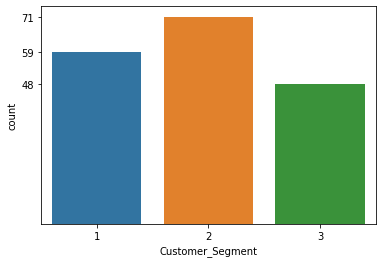

In [4]:
sns.countplot(data=df,x="Customer_Segment")
f=df["Customer_Segment"].value_counts()
plt.yticks(f)
plt.show()

In [5]:
#we have 3 class meaning this cass is a multiclass classifier 
#THIS IS A CLASSIFICATION ALGORITHM
#3 class means three type of customer

In [6]:
#check null value
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
#check datatype
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [8]:
#selecting input output
X=df.drop("Customer_Segment",axis=1)
Y=df["Customer_Segment"]

In [9]:
#creating 70 30 ratio using train test split
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1)
#stratify=output variable to minimise large gap in data sampling

In [10]:
Ytrain.value_counts() #before stratify

2    52
1    36
3    36
Name: Customer_Segment, dtype: int64

In [11]:
Ytest.value_counts() # before stratify

1    23
2    19
3    12
Name: Customer_Segment, dtype: int64

In [12]:
#creating 70 30 ratio using train test split
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)
#stratify=output variable to minimise large gap in data sampling

In [13]:
Ytrain.value_counts() #after stratify

2    50
1    41
3    33
Name: Customer_Segment, dtype: int64

In [14]:
Ytest.value_counts() #after stratify

2    21
1    18
3    15
Name: Customer_Segment, dtype: int64

In [15]:
# in PCA Standarization is compulsory
#scaling
from sklearn.preprocessing import StandardScaler

In [16]:
#creating object
ss=StandardScaler()
Xtrain=ss.fit_transform(Xtrain)
Xtest=ss.transform(Xtest)

In [17]:
Xtrain.shape

(124, 13)

# APPLYING PCA

In [18]:
#applying PCA
from sklearn.decomposition import PCA

In [19]:
#creating Object
pc=PCA(n_components=None,random_state=1)
#n_components  inbuilt parameters ,here  pass no. of components means PC here 
#total input 13 features input features

In [20]:
Xtrain_pc=pc.fit_transform(Xtrain)
Xtest_pc=pc.transform(Xtest)

In [21]:
#to find out VARIANCE
explain_variance=pc.explained_variance_ratio_
#pc.explained_variance_ratio_ inbuit method of PCA
print(explain_variance) #variance gets automatically arranged in decinding format

[0.35935182 0.20113893 0.11882529 0.07128404 0.0649561  0.04356648
 0.03545179 0.02881555 0.02103776 0.02007144 0.01614956 0.01140877
 0.00794247]


In [22]:
#training the model by taking "2" feature under consideration
#creating Object
pc1=PCA(n_components=2,random_state=1)
#n_components  inbuilt parameters ,here  pass no. of components means PC here 
#total input 13 features input features

In [23]:
Xtrain_pc1=pc1.fit_transform(Xtrain)
Xtest_pc1=pc1.transform(Xtest)

In [24]:
#to find out VARIANCE
pc1.explained_variance_ratio_

array([0.35935182, 0.20113893])

In [25]:
#creating model using LogisticRegression
from sklearn.linear_model import LogisticRegression


In [26]:
#given input : X_train_pc1 and Y_train to classifcation algorithm
def create_model(model):
    model.fit(Xtrain_pc1,Ytrain)
    Ypred=model.predict(Xtest_pc1)
    print(classification_report(Ytest,Ypred))
    print(confusion_matrix(Ytest,Ypred))
    return model

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
#creating object of LogiscticRegression
lr=LogisticRegression()

In [29]:
#calling Function
lr=create_model(lr)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


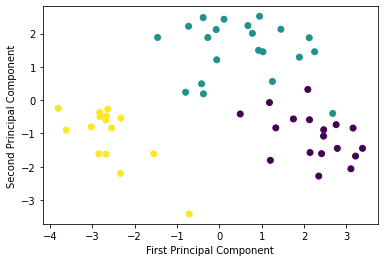

In [31]:
#giving a scatter plot
#plt.figure(figsize=(8,6))
y=Ytest
X1=Xtest_pc1[:,0]
X2=Xtest_pc1[:,1]
plt.scatter(X1,X2,c=y) #c means colour

#labeling x and y
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()